#### 정규화하지 않는 데이터로 모델링

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('fb-scaling-X')
df_y = read_data('fb-scaling-y')

In [3]:
training_columns = df_X.columns

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [5]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.354e+16, tolerance: 1.263e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.614899, MAPE: 20.250356, MSE: 3852597295367.121094, RMSE: 1962803.427592, MAE: 979001.039616
`LASSO` object has no attribute `feature_importances_`


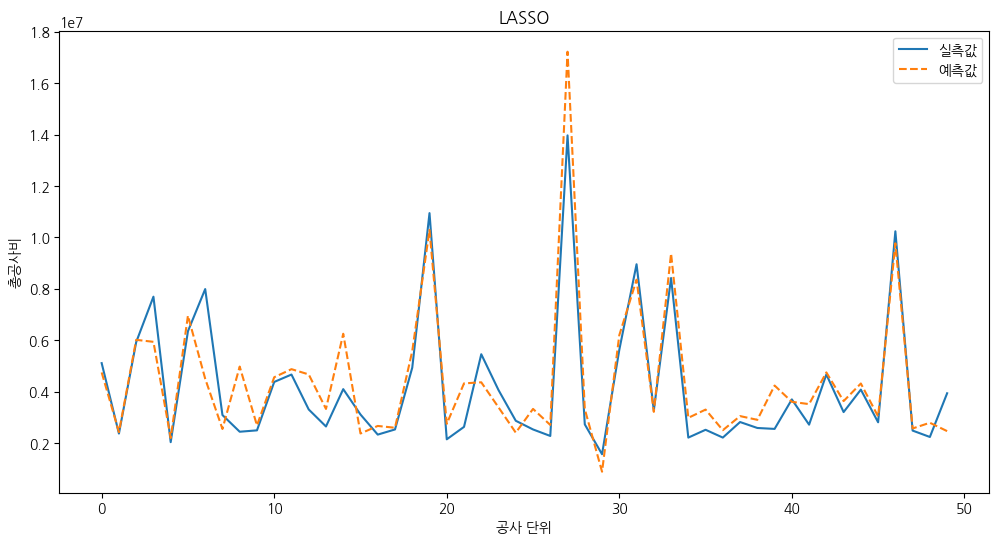

Evaluation: RIDGE
R2_SCORE: 0.615442, MAPE: 20.097820, MSE: 3847166262146.396484, RMSE: 1961419.450843, MAE: 974705.108480
`RIDGE` object has no attribute `feature_importances_`


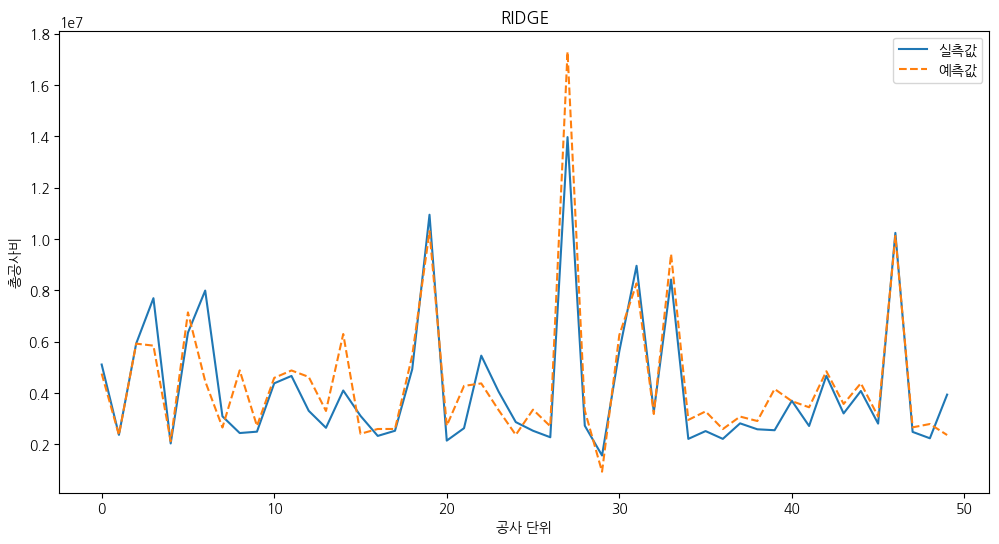

Evaluation: KNR
R2_SCORE: 0.526197, MAPE: 20.894558, MSE: 4739982843221.497070, RMSE: 2177150.165519, MAE: 1076667.854861
`KNR` object has no attribute `feature_importances_`


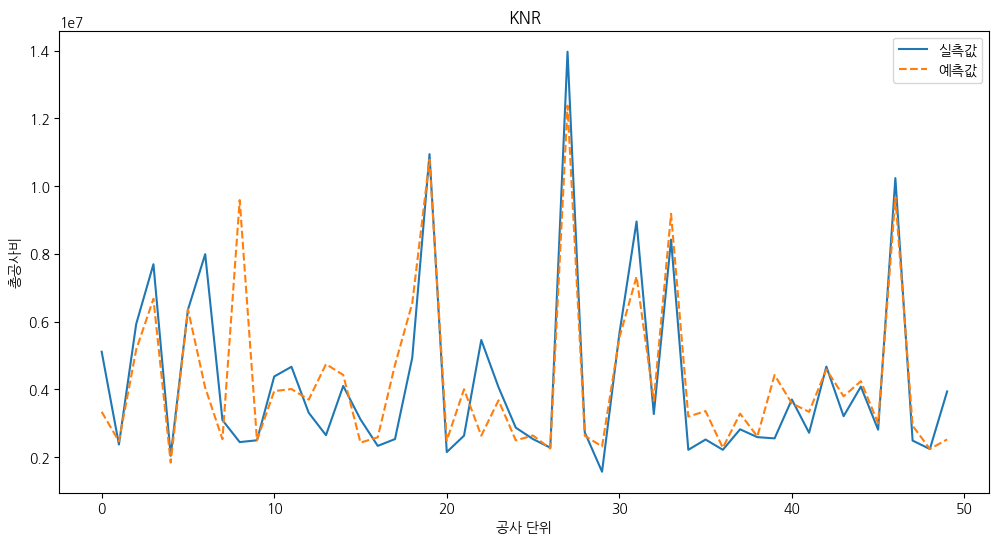

Evaluation: DTR
R2_SCORE: 0.102933, MAPE: 26.839579, MSE: 8974372454148.181641, RMSE: 2995725.697414, MAE: 1342874.966843


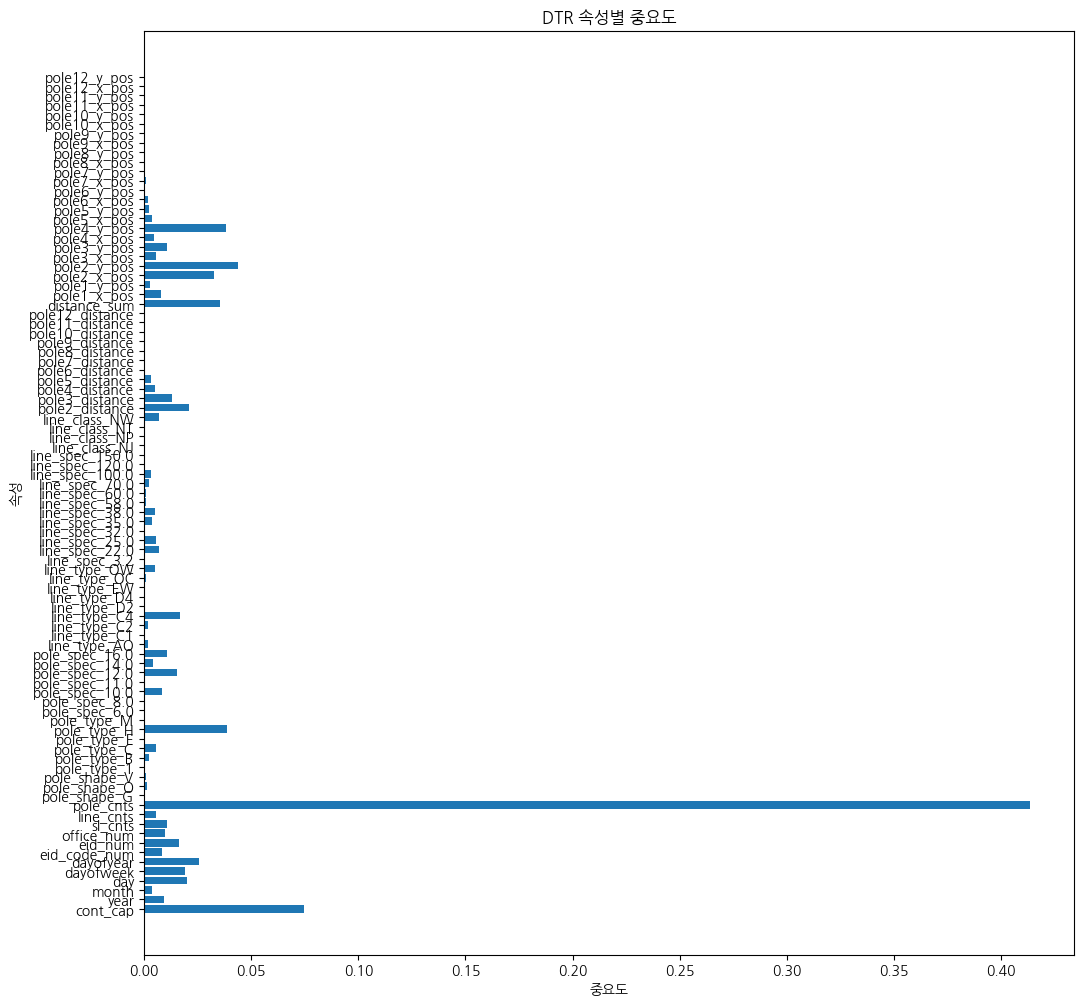

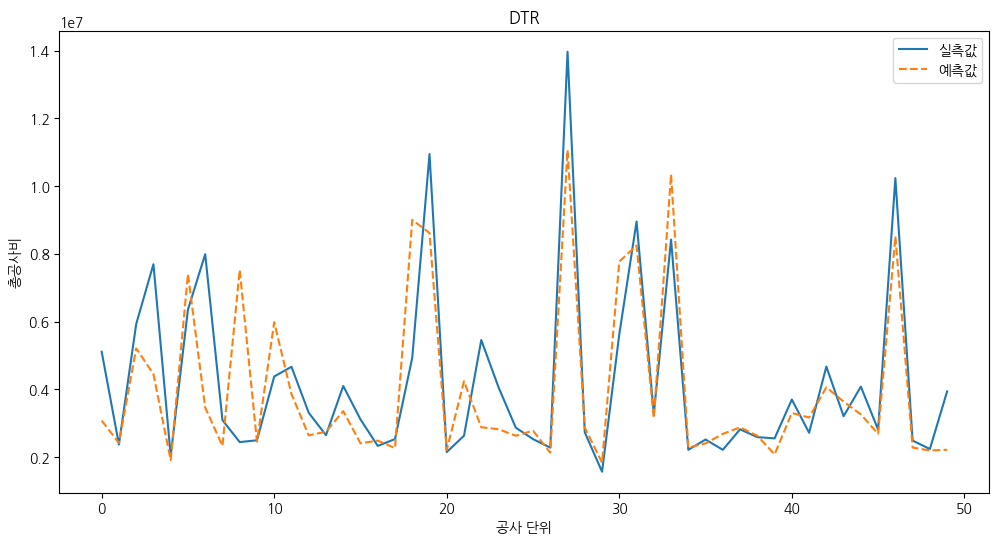

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.553430, MAPE: 20.732850, MSE: 4467538227804.987305, RMSE: 2113655.181860, MAE: 1017274.183052


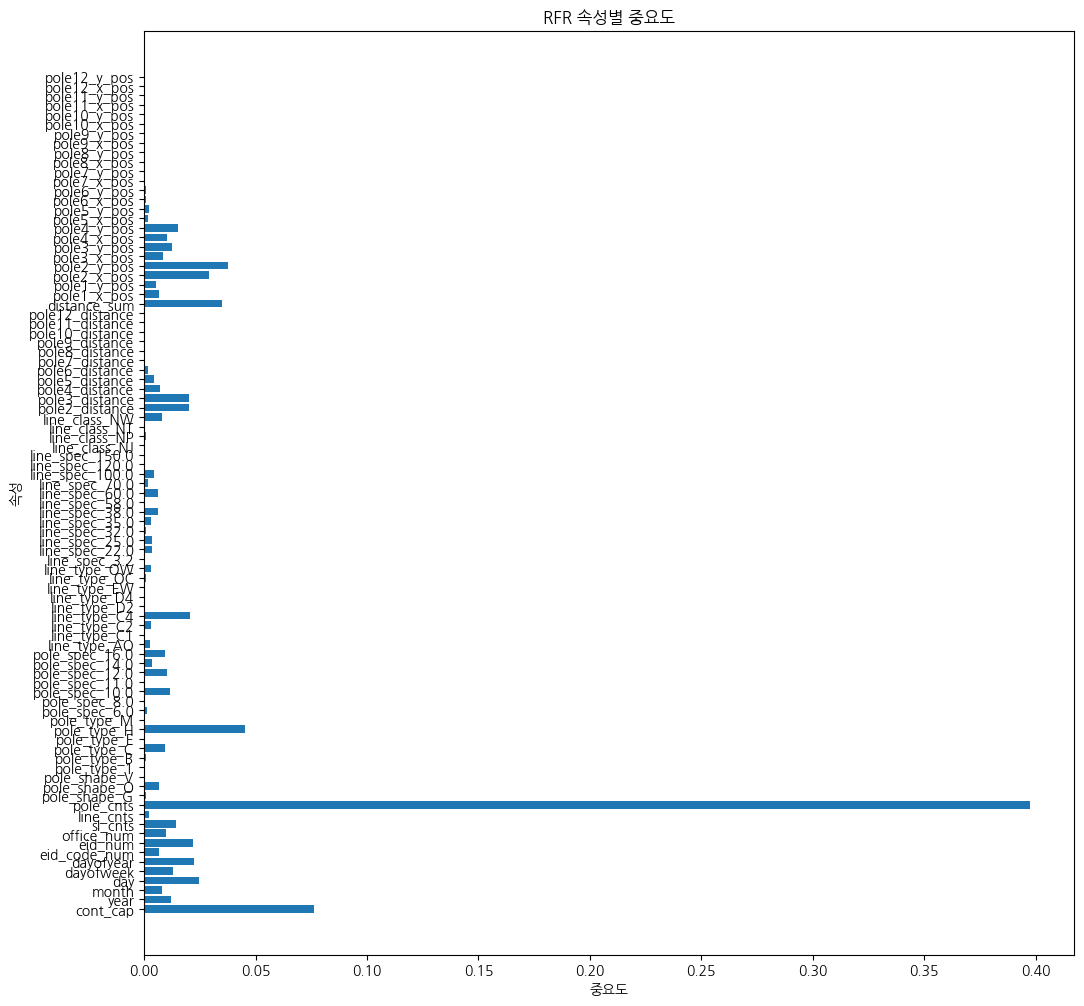

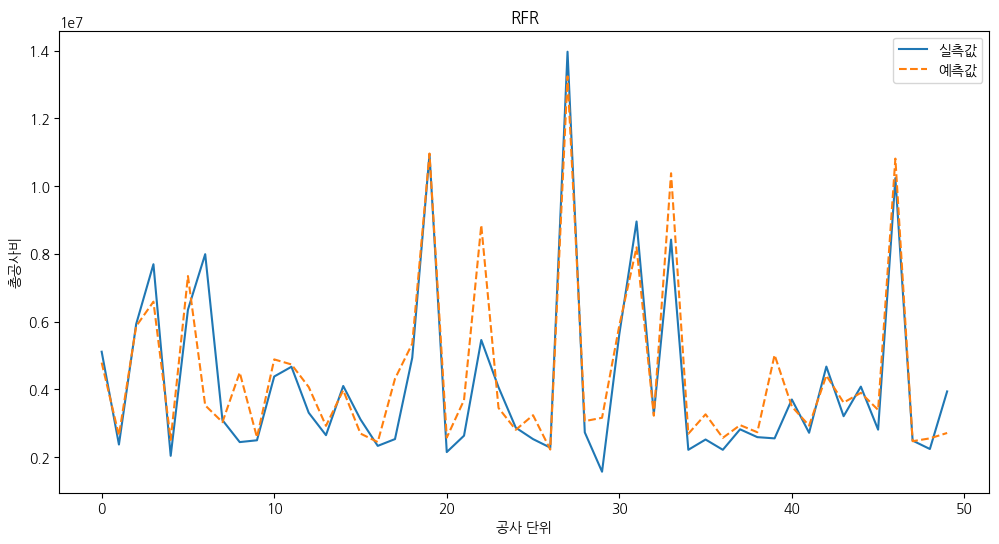

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.606153, MAPE: 19.513700, MSE: 3940092307477.852539, RMSE: 1984966.575909, MAE: 954765.607878


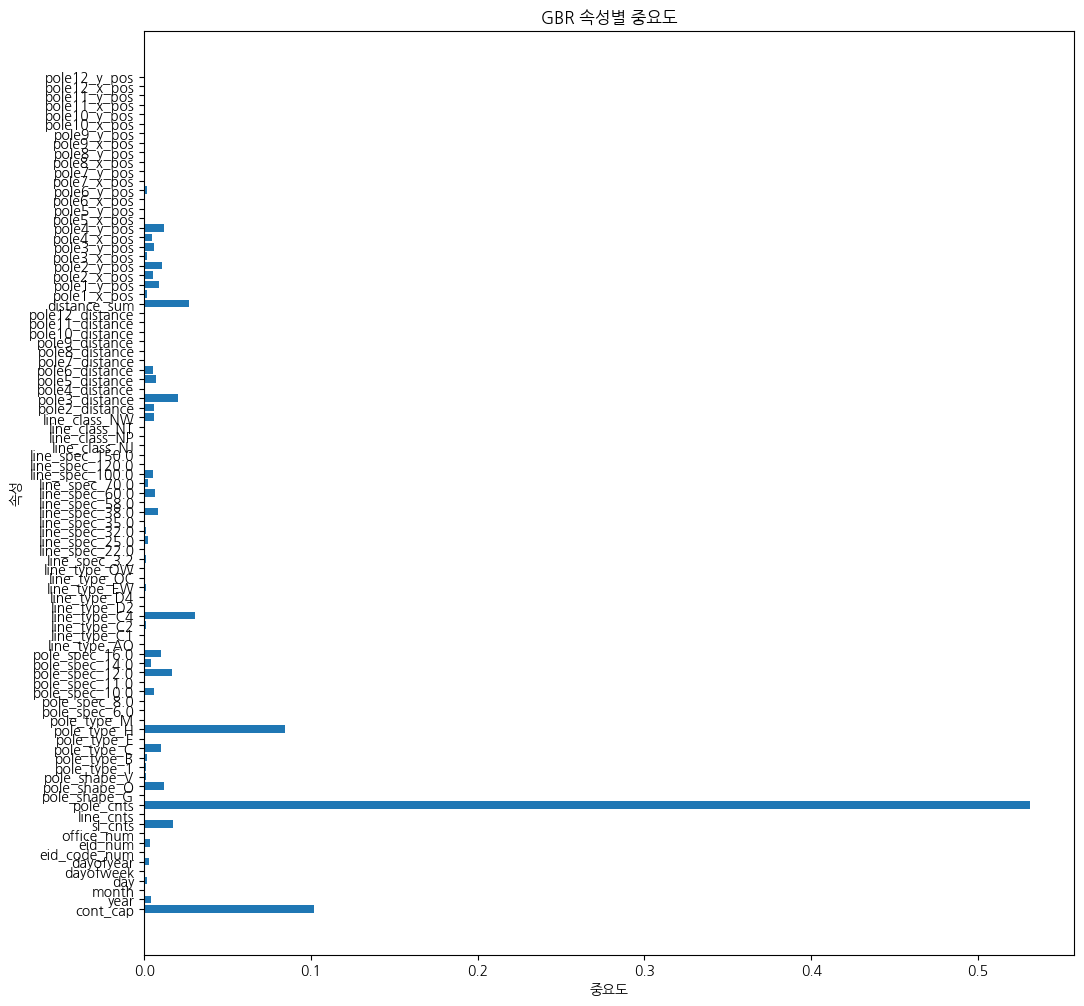

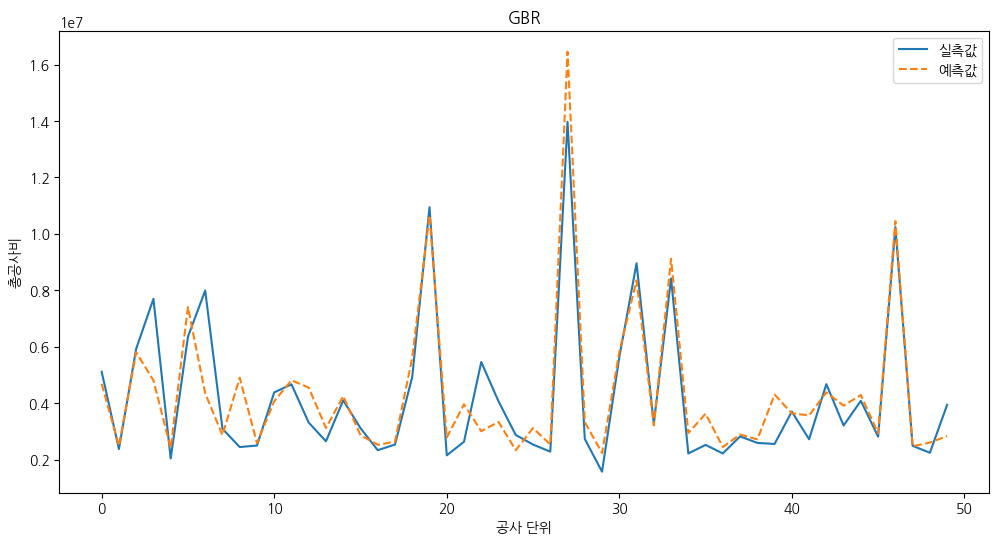

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.888e+15, tolerance: 1.263e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.603581, MAPE: 20.590531, MSE: 3965822958301.259766, RMSE: 1991437.410089, MAE: 996450.628712
`EN` object has no attribute `feature_importances_`


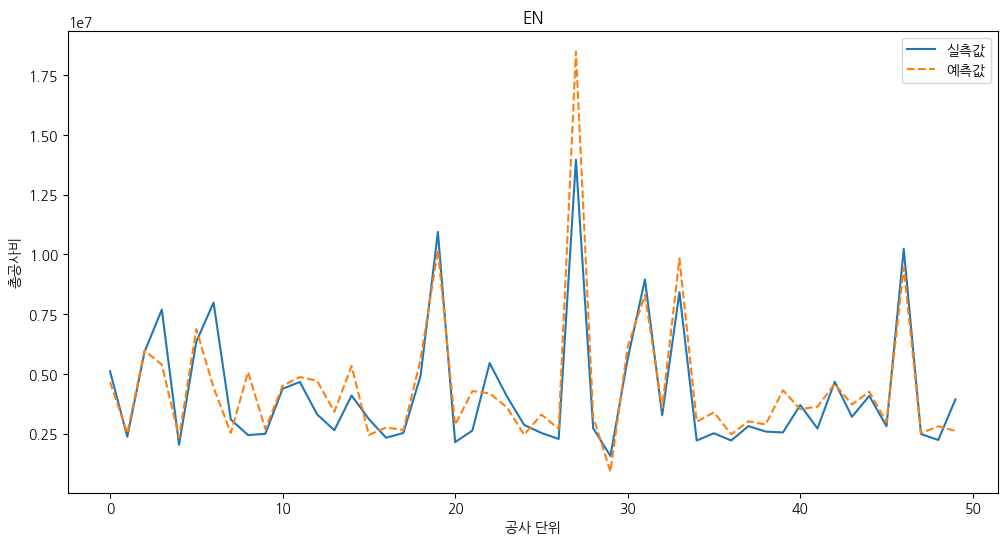

Evaluation: XGR
R2_SCORE: 0.199079, MAPE: 32.273863, MSE: 8012513039268.358398, RMSE: 2830638.274183, MAE: 1695693.442634


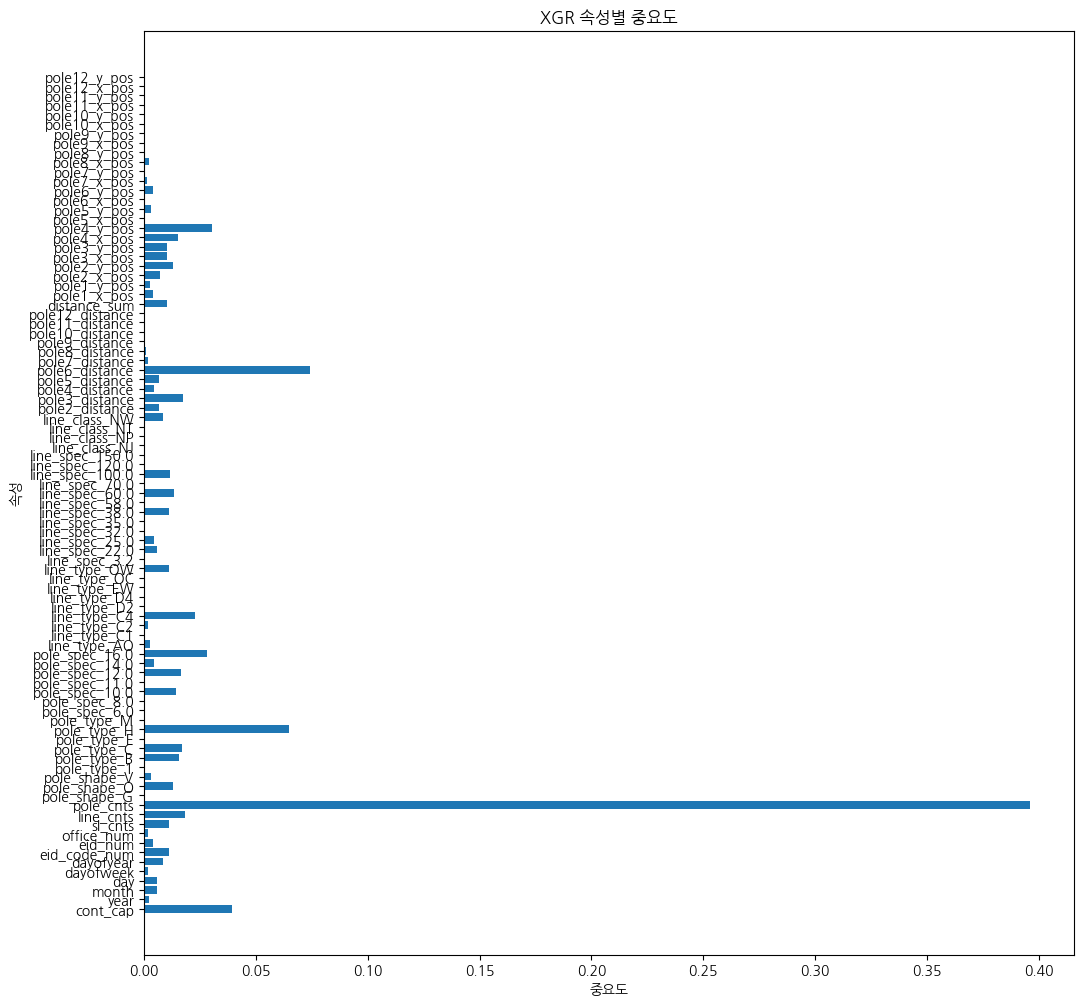

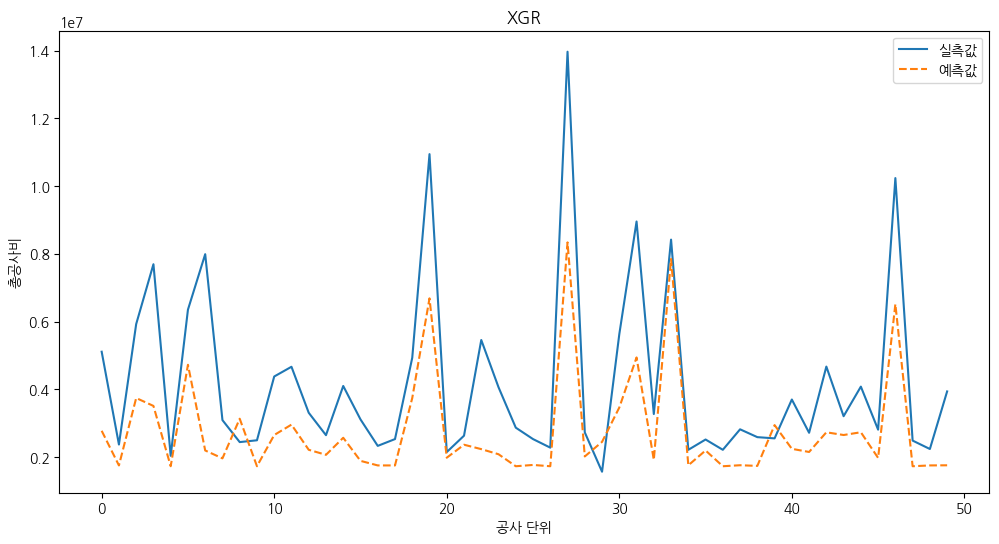

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.614899,0.202504,3.852597e+12,1.962803e+06,9.790010e+05
RIDGE,0.615442,0.200978,3.847166e+12,1.961419e+06,9.747051e+05
KNR,0.526197,0.208946,4.739983e+12,2.177150e+06,1.076668e+06
DTR,0.102933,0.268396,8.974372e+12,2.995726e+06,1.342875e+06
RFR,0.553430,0.207328,4.467538e+12,2.113655e+06,1.017274e+06
GBR,0.606153,0.195137,3.940092e+12,1.984967e+06,9.547656e+05
EN,0.603581,0.205905,3.965823e+12,1.991437e+06,9.964506e+05
XGR,0.199079,0.322739,8.012513e+12,2.830638e+06,1.695693e+06
